<div style="text-align:center; background-color:#f0f8ff; padding:30px; border-radius:15px">

<h1>🚗 Car Price Analytics</h1>
<h2>Hypothesis 03: Body Style vs Price</h2>

</div>


# 🚗 Car Price Analytics – Hypothesis Notebook

### 👩‍💻 Author: Hidaia 
### 🎓 Course: Code Institute – Data Analytics with AI Bootcamp  
### 🏁 Project Type: Hackathon 1  
### 👥 Team Name: Data Dynamos  

---

## 🎯 Notebook Purpose:
This notebook explores whether **car body style** significantly influences **car prices** using statistical analysis and visualization.


## 🧠 Introduction

This notebook explores whether **car body style** (such as sedan, hatchback, convertible, etc.) has a significant influence on **car prices**.

We will:
- Load and explore the cleaned dataset  
- Visualize how car price varies by body style  
- Perform statistical tests (ANOVA or Kruskal-Wallis) to check if differences are significant  
- Summarize the findings

The goal is to understand if certain body styles tend to have higher or lower prices.


In [2]:
# Import the main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
import os
os.listdir('../data/final')

['car_prices.csv']

In [7]:
import pandas as pd

# Read the dataset
df = pd.read_csv('../data/final/car_prices.csv')

# Display first 5 rows
df.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,...,highwaympg,price,manufacturer,model,compressionratio_bin,price_per_hp,power_to_weight_ratio,engine_efficiency,avg_mpg,price_per_mpg
0,3,petrol,std,two,convertible,rwd,88.6,168.8,64.1,48.8,...,27,13495.0,alfa-romero,giulia,Low,121.576577,0.043564,0.853846,24.0,562.291667
1,3,petrol,std,two,convertible,rwd,88.6,168.8,64.1,48.8,...,27,16500.0,alfa-romero,stelvio,Low,148.648649,0.043564,0.853846,24.0,687.500000
2,1,petrol,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,...,26,16500.0,alfa-romero,Quadrifoglio,Low,107.142857,0.054552,1.013158,22.5,733.333333
3,2,petrol,std,four,sedan,fwd,99.8,176.6,66.2,54.3,...,30,13950.0,audi,100 ls,Standard,136.764706,0.043646,0.935780,27.0,516.666667
4,2,petrol,std,four,sedan,4wd,99.4,176.6,66.4,54.3,...,22,17450.0,audi,100ls,Low,151.739130,0.040722,0.845588,20.0,872.500000


In [8]:
# Step 2: Check the column names
# --------------------------------------------
# This helps to confirm the names of columns we will use
print(df.columns)

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'manufacturer', 'model',
       'compressionratio_bin', 'price_per_hp', 'power_to_weight_ratio',
       'engine_efficiency', 'avg_mpg', 'price_per_mpg'],
      dtype='object')


In [9]:
# Group by carbody and calculate key statistics
body_summary = (
    df.groupby('carbody')['price']
      .agg(['count', 'mean', 'median', 'min', 'max'])
      .reset_index()
      .sort_values('mean', ascending=False)
)

print("📊 Average car price by body type:")
display(body_summary)

📊 Average car price by body type:


,carbody,count,mean,median,min,max
0,convertible,14,22072.214286,17084.5,8249.0,45400.0
2,sedan,96,14344.270833,10846.5,5499.0,41315.0
3,wagon,25,12371.960000,11694.0,6918.0,28248.0
1,hatchback,70,10376.652386,8897.0,5118.0,31400.5


C:\Users\ABDUL\AppData\Local\Temp\ipykernel_20696\450361413.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='carbody', y='mean', data=body_summary, palette='coolwarm')


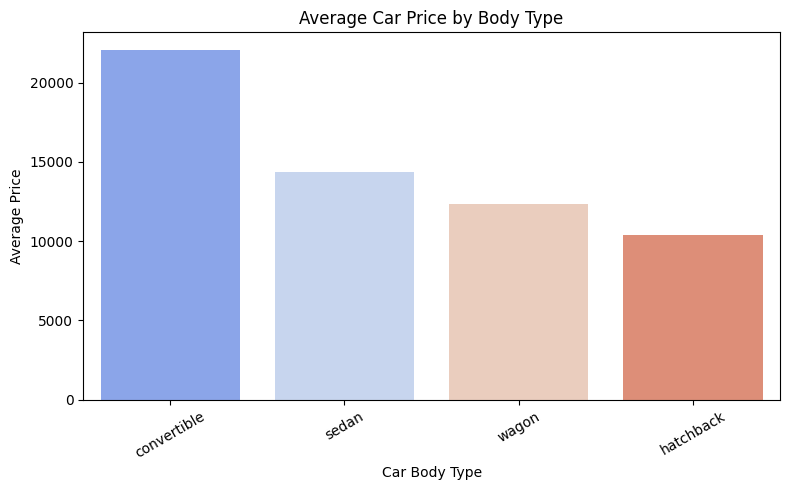

In [10]:
# : Visualization
# ------------------------------------------------

plt.figure(figsize=(8,5))
sns.barplot(x='carbody', y='mean', data=body_summary, palette='coolwarm')
plt.title('Average Car Price by Body Type')
plt.xlabel('Car Body Type')
plt.ylabel('Average Price')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

C:\Users\ABDUL\AppData\Local\Temp\ipykernel_20696\3212755340.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='carbody', y='price', data=df, palette='Set2')


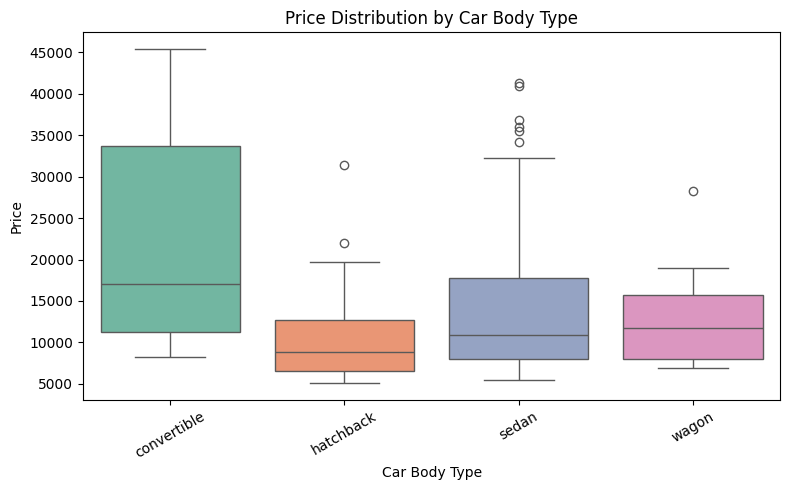

In [11]:
#  Boxplot to visualize price spread
# ------------------------------------------------

plt.figure(figsize=(8,5))
sns.boxplot(x='carbody', y='price', data=df, palette='Set2')
plt.title('Price Distribution by Car Body Type')
plt.xlabel('Car Body Type')
plt.ylabel('Price')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

C:\Users\ABDUL\AppData\Local\Temp\ipykernel_20696\587106421.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='carbody', y='price', data=df, jitter=True, alpha=0.6, palette='viridis')


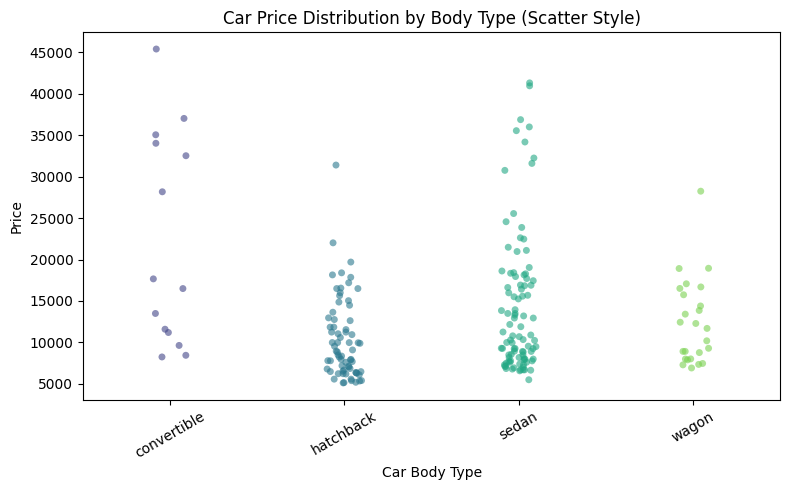

In [12]:
plt.figure(figsize=(8,5))
sns.stripplot(x='carbody', y='price', data=df, jitter=True, alpha=0.6, palette='viridis')
plt.title('Car Price Distribution by Body Type (Scatter Style)')
plt.xlabel('Car Body Type')
plt.ylabel('Price')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### Summary
Convertible cars have the highest prices, followed by sedans and wagons.
Hatchbacks are the most affordable. 
This suggests that body style has a clear impact on car prices.
